In [126]:
import numpy as np
import pandas as pd

# 2. LOAD DATA
df = pd.read_csv("WorkFromHomeBurnout.csv")

df.head()

user_id day_type  work_hours  screen_time_hours  meetings_count  \
0        1  Weekday        9.59              11.86               4   
1        1  Weekend        7.38              10.33               4   
2        1  Weekend        6.31               8.92               1   
3        1  Weekday        8.34              10.70               4   
4        1  Weekend        6.97               9.83               1   

   breaks_taken  after_hours_work  sleep_hours  task_completion_rate  \
0             2                 0         7.55                  91.2   
1             1                 0         6.69                  82.0   
2             2                 0         8.87                  80.6   
3             1                 1         8.13                  70.0   
4             2                 0         5.85                  67.1   

   burnout_score burnout_risk  
0          19.17          Low  
1          29.70          Low  
2          32.93          Low  
3          45.47          Low  
4          51.61          Low

In [127]:
columns = ['user_id', 'burnout_risk']
for column in columns:
    if column in df.columns:
        df = df.drop(column, axis=1)

print("Data Shape:", df.shape)
display(df.sample(5))

Data Shape: (1800, 9)


day_type  work_hours  screen_time_hours  meetings_count  breaks_taken  \
1311  Weekend        3.92               7.05               1             3   
320   Weekend        6.02               7.77               0             4   
794   Weekend        4.63               7.77               0             1   
1367  Weekend        3.51               5.97               1             1   
96    Weekend        3.00               4.52               0             4   

      after_hours_work  sleep_hours  task_completion_rate  burnout_score  
1311                 1         8.10                  89.9          25.04  
320                  0         6.28                  89.7          16.68  
794                  0         6.50                  73.3          39.41  
1367                 1         9.57                  74.1          43.26  
96                   1         9.33                  67.4          51.02

In [ ]:
# df.to_csv("clean.csv", index=False)

In [128]:
df['day_type'].unique().tolist()

['Weekday', 'Weekend']

In [129]:
# 3. PREPROCESSING
# 3.1 Encoding Ordinal Variables (Manual Mapping)
# 'day_type': Weekend -> 0, Weekday -> 1
if df['day_type'].dtype == object:
    df['day_type'] = df['day_type'].map({'Weekend':0, 'Weekday':1})

df.sample(8)

day_type  work_hours  screen_time_hours  meetings_count  breaks_taken  \
574          1        8.98              11.76               2             5   
144          1        8.83              12.06               2             2   
288          1        7.86              10.63               1             5   
1658         0        3.54               7.41               1             5   
995          1        8.71              11.34               1             2   
142          1        7.56               9.28               2             5   
886          0        4.29               8.15               1             5   
1677         1        8.49              10.41               3             5   

      after_hours_work  sleep_hours  task_completion_rate  burnout_score  
574                  0         5.90                  58.3          71.25  
144                  1         6.74                  49.6          74.52  
288                  1         5.93                  50.1          78.20  
1658                 1         6.75                  64.6          55.93  
995                  0         6.16                  44.7          91.50  
142                  1         7.79                  83.4          35.76  
886                  0         7.10                  80.3          37.23  
1677                 0         5.34                  67.8          51.12

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day_type              1800 non-null   int64  
 1   work_hours            1800 non-null   float64
 2   screen_time_hours     1800 non-null   float64
 3   meetings_count        1800 non-null   int64  
 4   breaks_taken          1800 non-null   int64  
 5   after_hours_work      1800 non-null   int64  
 6   sleep_hours           1800 non-null   float64
 7   task_completion_rate  1800 non-null   float64
 8   burnout_score         1800 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 126.7 KB


In [131]:
df.describe()

day_type   work_hours  screen_time_hours  meetings_count  \
count  1800.000000  1800.000000        1800.000000     1800.000000   
mean      0.486667     6.515117           9.271406        1.941111   
std       0.499961     2.290521           2.409253        1.696178   
min       0.000000     3.000000           4.510000        0.000000   
25%       0.000000     4.430000           7.240000        1.000000   
50%       0.000000     6.445000           9.210000        2.000000   
75%       1.000000     8.510000          11.310000        3.000000   
max       1.000000    12.170000          15.700000       10.000000   

       breaks_taken  after_hours_work  sleep_hours  task_completion_rate  \
count   1800.000000       1800.000000  1800.000000           1800.000000   
mean       3.028889          0.358889     6.996467             72.308556   
std        1.417844          0.479808     1.061740             14.978647   
min        1.000000          0.000000     4.500000             40.000000   
25%        2.000000          0.000000     6.280000             62.300000   
50%        3.000000          0.000000     6.990000             74.500000   
75%        4.000000          1.000000     7.750000             83.700000   
max        5.000000          1.000000    10.800000            107.200000   

       burnout_score  
count    1800.000000  
mean       44.009978  
std        23.881782  
min         2.500000  
25%        25.370000  
50%        39.270000  
75%        58.197500  
max       143.920000

### Handling Missing Values

In [132]:
null_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

print(null_summary)

                      Missing_Count  Missing_Percentage
day_type                          0                 0.0
work_hours                        0                 0.0
screen_time_hours                 0                 0.0
meetings_count                    0                 0.0
breaks_taken                      0                 0.0
after_hours_work                  0                 0.0
sleep_hours                       0                 0.0
task_completion_rate              0                 0.0
burnout_score                     0                 0.0


In [ ]:
# missing_values = df.isnull().sum()
# if missing_values != 0:
#     df.dropna()

# if df.isna().any().any():
#     df = df.dropna()

In [133]:
missing = df.isna().sum()
print(f"{missing} missing rows found.")


day_type                0
work_hours              0
screen_time_hours       0
meetings_count          0
breaks_taken            0
after_hours_work        0
sleep_hours             0
task_completion_rate    0
burnout_score           0
dtype: int64 missing rows found.


### Handling Duplicated Values

In [134]:
duplicated = df.duplicated().sum()
print(f"{duplicated} duplicated rows found.")

if duplicated > 0:
    df = df.drop_duplicates()
    
print(f"{duplicated} duplicated rows removed.")

print(df.shape)

0 duplicated rows found.
0 duplicated rows removed.
(1800, 9)


In [135]:
df.describe()

day_type   work_hours  screen_time_hours  meetings_count  \
count  1800.000000  1800.000000        1800.000000     1800.000000   
mean      0.486667     6.515117           9.271406        1.941111   
std       0.499961     2.290521           2.409253        1.696178   
min       0.000000     3.000000           4.510000        0.000000   
25%       0.000000     4.430000           7.240000        1.000000   
50%       0.000000     6.445000           9.210000        2.000000   
75%       1.000000     8.510000          11.310000        3.000000   
max       1.000000    12.170000          15.700000       10.000000   

       breaks_taken  after_hours_work  sleep_hours  task_completion_rate  \
count   1800.000000       1800.000000  1800.000000           1800.000000   
mean       3.028889          0.358889     6.996467             72.308556   
std        1.417844          0.479808     1.061740             14.978647   
min        1.000000          0.000000     4.500000             40.000000   
25%        2.000000          0.000000     6.280000             62.300000   
50%        3.000000          0.000000     6.990000             74.500000   
75%        4.000000          1.000000     7.750000             83.700000   
max        5.000000          1.000000    10.800000            107.200000   

       burnout_score  
count    1800.000000  
mean       44.009978  
std        23.881782  
min         2.500000  
25%        25.370000  
50%        39.270000  
75%        58.197500  
max       143.920000

## all-columns

In [136]:
# Numerical and Categorical Features
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Categorical Columns::")
print(categorical_cols.tolist())
print()
print("Numerical Columns:")
print(numerical_cols.tolist())

Categorical Columns::
[]

Numerical Columns:
['day_type', 'work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken', 'after_hours_work', 'sleep_hours', 'task_completion_rate', 'burnout_score']


### 1. day_type

0: 924
1: 876


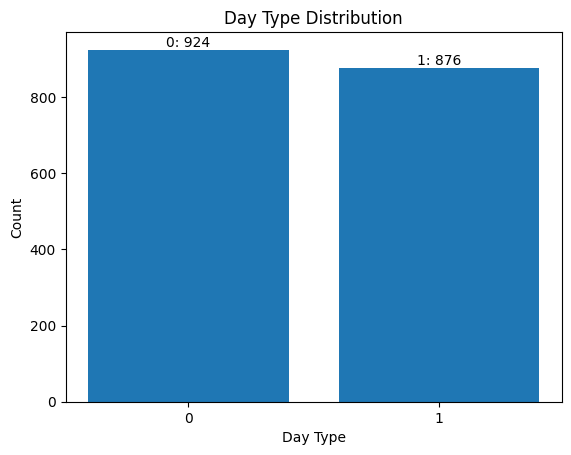

In [137]:
import matplotlib.pyplot as plt

counts = df['day_type'].value_counts()

for day_type, count in counts.items():
    print(f"{day_type}: {count}")

counts = df['day_type'].value_counts().sort_index()

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.title('Day Type Distribution')

# add labels like "0: 924"
for x, y in zip(counts.index, counts.values):
    plt.text(str(x), y, f"{x}: {y}", ha='center', va='bottom')

plt.show()


          Name: day_type       
     Data Type: int64
Missing Values: 0

count    1800.0
mean     0.4866666666666667
std      0.49996108798001815
min      0.0
25%      0.0
50%      0.0
75%      1.0
max      1.0


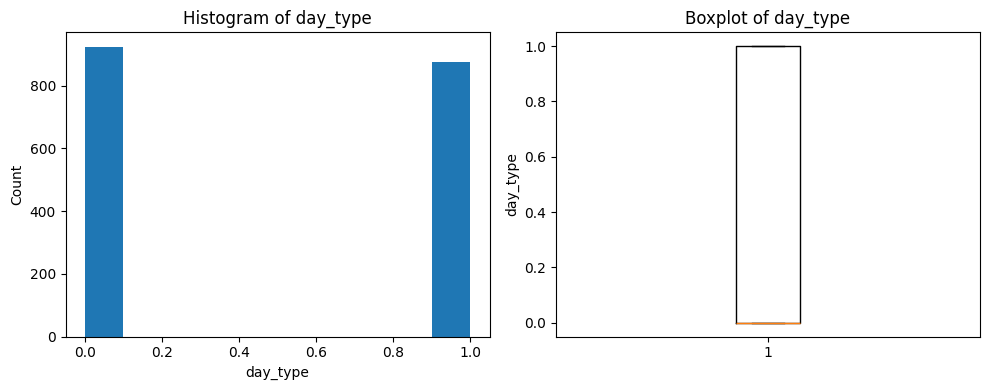

In [138]:
# day_type
field = 'day_type'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 2. work_hours

          Name: work_hours       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     6.515116666666666
std      2.290520933184967
min      3.0
25%      4.43
50%      6.445
75%      8.51
max      12.17


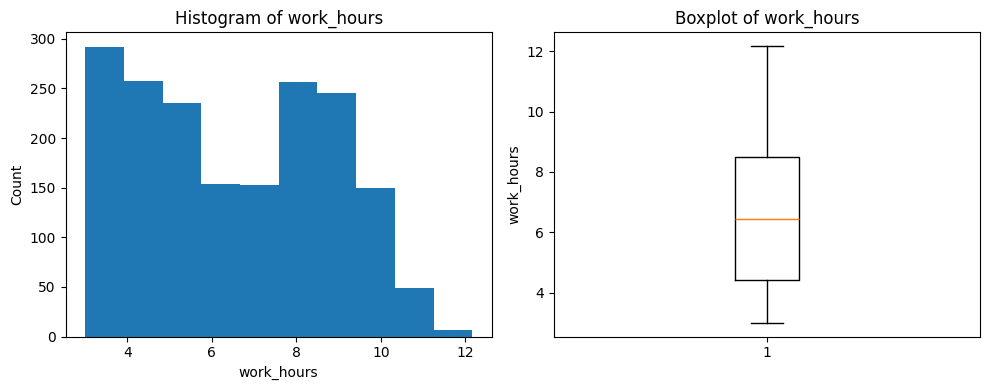

In [139]:
# work_hours
field = 'work_hours'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 3. screen_time_hours

          Name: screen_time_hours       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     9.271405555555555
std      2.4092530013319795
min      4.51
25%      7.24
50%      9.21
75%      11.31
max      15.7


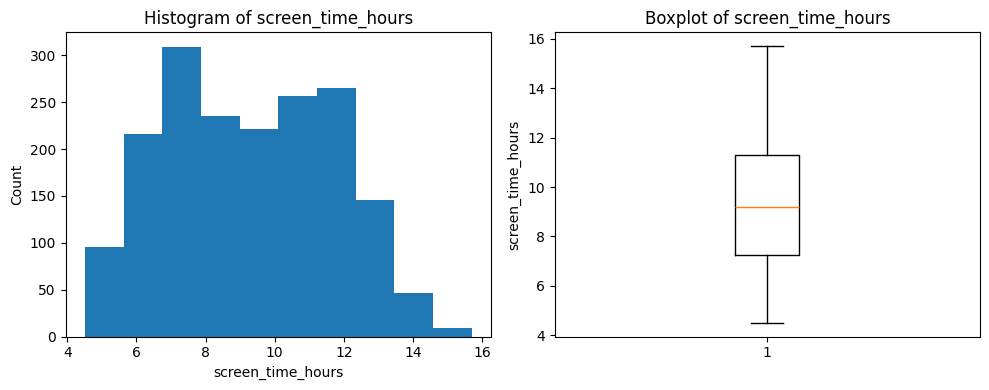

In [140]:
# screen_time_hours
field = 'screen_time_hours'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 4. meetings_count

          Name: meetings_count       
     Data Type: int64
Missing Values: 0

count    1800.0
mean     1.941111111111111
std      1.6961778596973558
min      0.0
25%      1.0
50%      2.0
75%      3.0
max      10.0


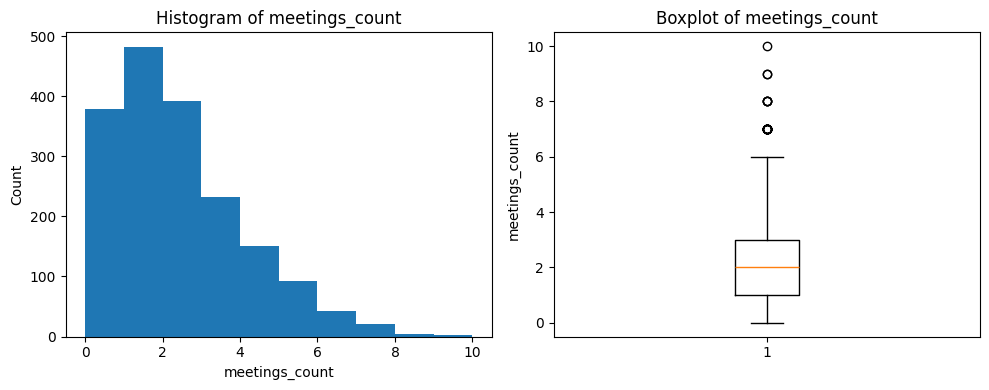

In [141]:
# meetings_count
field = 'meetings_count'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 5. breaks_taken

          Name: breaks_taken       
     Data Type: int64
Missing Values: 0

count    1800.0
mean     3.028888888888889
std      1.4178442282472656
min      1.0
25%      2.0
50%      3.0
75%      4.0
max      5.0


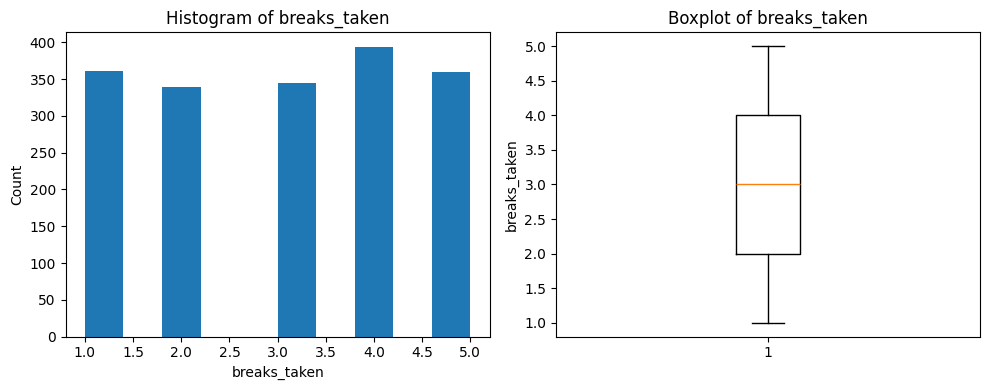

In [142]:
# breaks_taken
field = 'breaks_taken'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 6. after_hours_work

          Name: after_hours_work       
     Data Type: int64
Missing Values: 0

count    1800.0
mean     0.35888888888888887
std      0.47980782804138694
min      0.0
25%      0.0
50%      0.0
75%      1.0
max      1.0


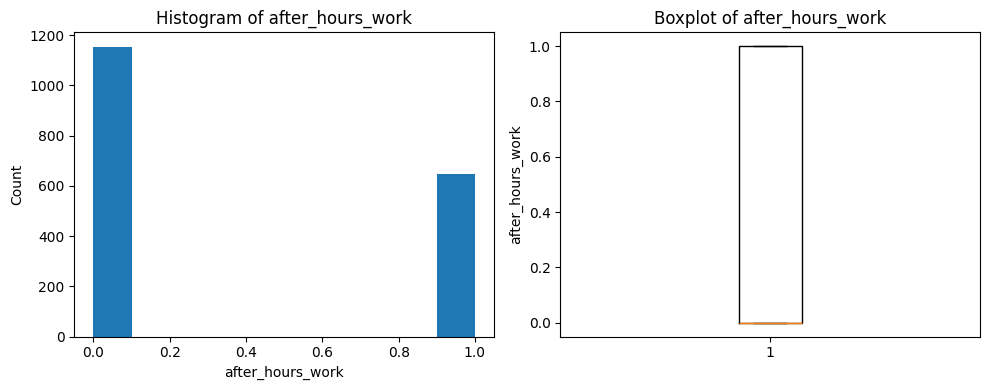

In [143]:
# after_hours_work
field = 'after_hours_work'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

### 7. sleep_hours

In [144]:
# sleep_hours
field = 'sleep_hours'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

          Name: sleep_hours       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     6.996466666666667
std      1.0617404005473892
min      4.5
25%      6.28
50%      6.99
75%      7.75
max      10.8


### 8. task_completion_rate

          Name: task_completion_rate       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     72.30855555555556
std      14.97864680330159
min      40.0
25%      62.3
50%      74.5
75%      83.7
max      107.2


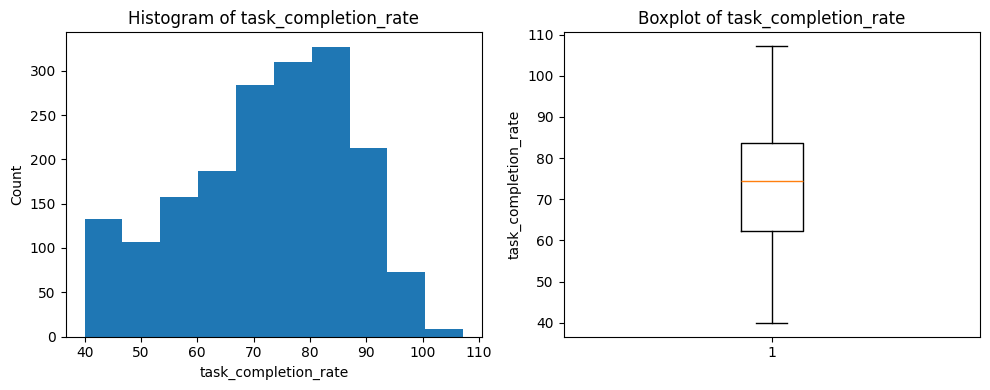

In [145]:
# task_completion_rate
field = 'task_completion_rate'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

In [146]:
# For any rate column where rate > 100 and rate < 0
field = 'task_completion_rate'
valid_mean = df.loc[
    (df[field] >= 0) & (df[field] <= 100),
    field
].mean()

df[field] = np.where(
    (df[field] > 100) | (df[field] < 0),
    valid_mean,
    df[field]
)

In [147]:
# task_completion_rate
field = 'task_completion_rate'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

          Name: task_completion_rate       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     72.14111731843575
std      14.80916767885322
min      40.0
25%      62.3
50%      74.3
75%      83.6
max      100.0


### 9. burnout_score

In [148]:
# burnout_score
field = 'burnout_score'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

          Name: burnout_score       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     44.00997777777777
std      23.881782058406365
min      2.5
25%      25.369999999999997
50%      39.269999999999996
75%      58.1975
max      143.92


In [149]:
# For any rate column where rate > 100 and rate < 0
field = 'burnout_score'
valid_mean = df.loc[
    (df[field] >= 0) & (df[field] <= 100),
    field
].mean()

df[field] = np.where(
    (df[field] > 100) | (df[field] < 0),
    valid_mean,
    df[field]
)

In [150]:
# burnout_score
field = 'burnout_score'

# ------------------------------------------------------------------------
desc = df[field].describe()

# Print name and dtype
print(f"          Name: {df[field].name} \
      \n     Data Type: {df[field].dtype}")
print(f"Missing Values: {df[field].isna().sum()}\n")

# Print describe table without the last pandas info
for stat, value in desc.items():
    print(f"{stat:<8} {value}")

# ------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
axes[0].hist(df[field].dropna())
axes[0].set_title(f'Histogram of {field}')
axes[0].set_xlabel(field)
axes[0].set_ylabel('Count')

# Boxplot
axes[1].boxplot(df[field].dropna(), vert=True)
axes[1].set_title(f'Boxplot of {field}')
axes[1].set_ylabel(field)

plt.tight_layout()
plt.show()

          Name: burnout_score       
     Data Type: float64
Missing Values: 0

count    1800.0
mean     42.54148043108338
std      21.561686387303073
min      2.5
25%      25.369999999999997
50%      39.269999999999996
75%      56.11
max      99.69


In [153]:
# Input-Target 
X = df.drop(['burnout_score'], axis=1)
y = df[['burnout_score']]

In [154]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [155]:
X = preprocessor.fit_transform(X)
X.shape

(1800, 8)

In [157]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1440, 8), (360, 8))

In [158]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [160]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [165]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [166]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

c:\Users\NAN\Desktop\burnout-score-prediction-system\venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\NAN\Desktop\burnout-score-prediction-system\venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

c:\Users\NAN\Desktop\burnout-score-prediction-system\venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\NAN\Desktop\burnout-score-prediction-system\venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
results_df

Model       MAE       RMSE        R2
5  Random Forest Regressor  5.550425   7.901958  0.868733
7    CatBoosting Regressor  5.701172   8.123313  0.861276
8       AdaBoost Regressor  6.222763   8.613348  0.844034
6             XGBRegressor  6.100329   8.913245  0.832985
0        Linear Regression  6.040384   9.221480  0.821234
2                    Ridge  6.042945   9.222053  0.821211
1                    Lasso  6.279993   9.305850  0.817947
4            Decision Tree  6.753627   9.525170  0.809265
3    K-Neighbors Regressor  7.874096  10.609255  0.763378

In [169]:
best_model_name = results_df.iloc[0]["Model"]
best_rmse = results_df.iloc[0]["RMSE"]

print(f"Best Model: {best_model_name}")
print(f"Best RMSE : {best_rmse:.2f}")

Best Model: Random Forest Regressor
Best RMSE : 7.90


In [170]:
df.to_csv("cleanedData.csv", index=False)

In [161]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 9.0033
- Mean Absolute Error: 5.8405
- R2 Score: 0.8243
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.2215
- Mean Absolute Error: 6.0404
- R2 Score: 0.8212


Lasso
Model performance for Training set
- Root Mean Squared Error: 9.0749
- Mean Absolute Error: 6.0603
- R2 Score: 0.8215
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.3059
- Mean Absolute Error: 6.2800
- R2 Score: 0.8179


Ridge
Model performance for Training set
- Root Mean Squared Error: 9.0033
- Mean Absolute Error: 5.8425
- R2 Score: 0.8243
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.2221
- Mean Absolute Error: 6.0429
- R2 Score: 0.8212


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 8.4608
- Mean Absolute Error: 6.1672
- R2 Score: 0.8449
-----------------------

c:\Users\NAN\Desktop\burnout-score-prediction-system\venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 3.2344
- Mean Absolute Error: 2.1427
- R2 Score: 0.9773
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.1105
- Mean Absolute Error: 5.5824
- R2 Score: 0.8617


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.1865
- Mean Absolute Error: 0.8650
- R2 Score: 0.9969
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.9132
- Mean Absolute Error: 6.1003
- R2 Score: 0.8330


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 3.6442
- Mean Absolute Error: 2.8828
- R2 Score: 0.9712
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.1233
- Mean Absolute Error: 5.7012
- R2 Score: 0.8613


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 8.7085
- Mean Absolute Error: 6.2240
- R2 Score: 0.83

c:\Users\NAN\Desktop\burnout-score-prediction-system\venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [164]:
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
5  Random Forest Regressor  0.861714
7    CatBoosting Regressor  0.861276
8       AdaBoost Regressor  0.842092
6             XGBRegressor  0.832985
0        Linear Regression  0.821234
2                    Ridge  0.821211
1                    Lasso  0.817947
4            Decision Tree  0.799090
3    K-Neighbors Regressor  0.763378

In [ ]:
# # Scale X
# X_scaled = pd.DataFrame(scaler_X.fit_transform(X), columns=X.columns)

# # Scale y
# y_scaled = pd.DataFrame(scaler_y.fit_transform(y), columns=['price'])

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# # Flatten y for models
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()

In [ ]:
# # 6. MODEL TRAINING (Linear Regression)
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print("   MODEL EVALUATION METRICS")
# print("   (Data Scaled 0-1)")
# print(f"R2 Score (Accuracy): {r2:.4f}")
# print(f"MAE (Normalized):    {mae:.4f}")
# print(f"MSE (Normalized):    {mse:.4f}")
# print(f"RMSE (Normalized):   {rmse:.4f}")
